# Data analysis and feature extraction with Python

## Use data visualization, feature engineering, and feature selection to make a simple logistic regression look powerful

---

I was a kid when the _Titanic_ movie came out. In my mind, I still keep the picture of hundreds of people queuing to buy tickets for the cinema. Back then, Leonardo DiCaprio and Kate Winslet were just two kids with lovely haircuts and online tickets were science fiction.

According to engineers, a group to which I proudly belong, the Titanic was a masterpiece of human engineering. It was beautiful, luxurious, and fast. Titanic was everything. It just wasn't unsinkable.

After 100 years, the Titanic still remains a discussion subject in many areas. For example, you can find [books](https://amzn.to/2Gie0Pv) that offer leadership lessons from the Titanic that you can apply to your business; you can find interesting [AI projects](http://fortune.com/2018/03/26/china-titanic-artificial-intelligence-sensetime/) that apply Deep Learning to distinguish Titanic’s romantic scenes from disaster scenes; or you can find extensive exercises of creative thinking regarding [what really happened with the Titanic](https://www.bustle.com/p/6-titanic-conspiracy-theories-that-are-still-fascinating-today-28519).

We will keep the trend and use Titanic to do something (useful): to learn **exploratory data analysis** and **feature extraction** techniques. Through a complete analysis of the Kaggle's Titanic problem, we will go through the basic steps of a data science problem. Topics like **data visualization**, **missing data imputation**, **feature engineering**, **feature selection**, and **logistic regression** will be covered. These techniques are applicable to most data science problems. Thus, unlike Titanic, this is something that you can use more than once.

Since I believe in the transforming power of startups&#x2014;and seeing obvious similarities between what startups do and what a data scientist does&#x2014;several references to startup methods are presented in the text. Also, you'll find some Titanic jokes. Not because I believe in their power to make someone laugh, but because i think they are terrific icebreakers.

This notebook has been divided into four parts. The first part deals with the development of a baseline model. This model allows us to quickly understand the problem and the data. Afterwards, we will do more detailed analysis, studying and enriching data through exploratory data analysis and feature extraction. Hopefully, this will improve the performance of our machine learning model. Finally, some conclusions will be drawn from this notebook and its impact in our data science journey.

**Index**

1. [The lean data set](#1.-The-lean-data-set)
 1. [Doing the pitch](#1.A.-Doing-the-pitch)
 1. [Showing the numbers](#1.B.-Showing-the-numbers)
 1. [Filling the gaps](#1.C.-Filling-the-gaps)
 1. [Minimum viable model](#1.D.-Minimum-viable-model)
 
1. [The chubby data set](#2.-The-chubby-data-set)
 1. [Imputation of 'Age' missing data](#2.A.-Imputation-of-'Age'-missing-data) 
 1. [Exploratory data analysis](#2.B.-Exploratory-data-analysis)
 1. [Feature extraction](#2.C.-Feature-extraction)
  
1. [Unicorn model](#3.-Unicorn-model)
 1. [Fit model for best feature combination](#3.A.-Fit-model-for-best-feature-combination)
 1. [Learning curve](#3.B.-Learning-curve)
 1. [Validation curve](#3.C.-Validation-curve)
 1. [Submit predictions](#3.D.-Submit-predictions)

1. [Conclusion](#4.-Conclusion)

**Note:** Be prepared, this is a long read. Bring your notebook, sit on your favorite chair, and pour cola into a glass full of ice. Ice is important because cola always goes down well with ice. Just like the Titanic.

---

# 0. Belfast, an earlier incubator

Incubators are companies that give support and guidance to startups. Incubators are important because they help entrepreneurs solve common problems of those who have a business, such as finding a workspace, providing training, and raising money.

Our notebook also needs some support and guidance. This will be provided by a set of libraries and functions, which will play the role of incubator mentors.

## Imports

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Functions

In [24]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [25]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [26]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

---

# 1. The lean data set

In the book [_The Lean Startup_](https://amzn.to/2sHpnvP), Eric Ries talks about his personal experiences adapting lean management principles to high-tech startup companies. Through a series of anecdotes and stories, Ries teaches us all we need to know about agile and lean methodologies.

While a set of important principles are taught throughout the book, the truth is that the lean startup approach always ends up trying to answer a question: &#x201c;Should this product be built?&#x201d; 

To answer this question, the lean startup approach relies on a Build-Measure-Learn process. This process emphasizes rapid iteration as a critical ingredient to product development. It goes through the following phases:
1. **Build**. Figure out the problem that needs to be solved, generate ideas about how to solve it, and select the best one. Turn your best idea into a Minimum Viable Product (MVP).
1. **Measure**. Test your MVP. Go to your customers and measure their reactions and behaviors when using your product.  
1. **Learn**. Analyze the data you collected when testing the product with your customers. Draw conclusions from the experiment and decide what to do next.
In other words, this is a validated learning process that quickly builds, tests, and rebuilds products, according to users' feedback. This reduces market risks because it fails fast and cheap, allowing the product to be closer to what the market wants with each iteration.

We do something similar in this notebook: 
1. **Build**. We start by building, as fast as possible, a working end-to-end pipeline. This will be our MVP.
1. **Measure**. Then, we instrument the pipeline to evaluate the performance of our solution. This is where we test our MVP.
1. **Learn**. Finally, we analyse the performance of our solution. This is where we decide what to do next.

This practical methodology was adapted from Goodfellow et al. (2016)&#x2014;a book you can access for free [here](http://www.deeplearningbook.org/)&#x2014;and it can be applied to any data science problem.

**Pop quiz:** Was the Titanic a MVP?

## 1.A. Doing the pitch

Startups use pitches to sell ideas. Pitches are brief presentations that provide an overview of your business idea. They are important because investors are more likely to invest when they understand what you're doing. Thus, your pitch should be clear, concise, and able to answer questions like &#x201c;what do you do?&#x201d;, &#x201c;what do you want?&#x201d;, and &#x201c;who's on your team?&#x201d;.

To get a clear and concise picture of what is in our data set and what we can do with it, let's return the first rows of our data set.

In [27]:
# Import data
df = pd.read_csv('template_bh/data/train.csv')
df_raw = df.copy()

In [28]:
# Overview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Definitions and first impressions:

* **PassengerId**. Unique identification of the passenger. It shouldn't be necessary for our machine learning model.
* **Survived**. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
* **Pclass**. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
* **Name**. Name of the passenger. We need to parse before using it.
* **Sex**. Sex. Categorical variable that should be encoded.
* **Age**. Age in years. Ready to go.
* **SibSp**. # of siblings / spouses aboard the Titanic. Ready to go.
* **Parch**. # of parents / children aboard the Titanic. Ready to go.
* **Ticket**. Ticket number. Big mess. We need to understand its structure first.
* **Fare**. Passenger fare. Ready to go.
* **Cabin**. Cabin number. It needs to be parsed.
* **Embarked**. Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Categorical feature that should be encoded.

The main conclusion is that we already have a set of features that we can easily use in our machine learning model. Other features, like 'Name', 'Ticket', and 'Fare' require an additional effort before we can integrate them.

## 1.B. Showing the numbers

Numbers are crucial to set goals, to make sound business decisions, and to obtain money from investors. With numbers you can project the future of your startup, so that everyone can understand what the expectations are around your idea.

To get some numbers, we will do a descriptive statistical analysis of our data set.

In [29]:
# Descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are three aspects that I usually pay attention to when I'm analysing descriptive statistics:
1. **Min and max values**. This gives us an idea about the range of values and it may be helpful to detect outliers. In our case, all the min and max values seem to make sense given the context of the problem. The only exception would be, eventually, the max value of 'Fare'. For now, we will leave it as it is.
2. **Mean and standard deviation**. The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. For example, a low standard deviation suggests that the data points tend to be close to the mean. Taking a quick look, everything seems to be fine with the average and standard deviation values.
3. **Count**. This is important to give us an idea on the volume of the missing data. Here, we can see that some data regarding the 'Age' feature is missing.

Completed this step, let's move on to the analysis of missing data.

## 1.C. Filling the gaps

One of my favorite startup definitions belongs to Eric Ries: &#x201c;a startup is a human institution designed to create a new product or service under conditions of extreme uncertainty.&#x201d;

The word &#x201c;uncertainty&#x201d; is key in this definition, as it is in missing data. Missing data occurs when no data value on one or more features is available. Some of the main problems resulting from missing data are:

* It reduces the size of the data set.
* It is a possible source of bias, since some non-random mechanism can be generating the missing data. 

Therefore, missing data introduces uncertainty in our analysis.

There are several strategies to deal with missing data. Some of the most common are: 
* Use only valid data, deleting the cases where data is missing.  
* Impute data using values from similar cases or using the mean value (mean imputation). 
* Impute data using model-based methods (models are defined to predict the missing values).

Until today, I never found a &#x201c;one size fits all&#x201d; solution. I have some dogmas (e.g., I usually exclude features with more than 25% of missing data), but what usually guides my analysis is critical thinking, intuition, and need (sometimes we need to leave our dogmas at the door, if we want to generate some results).

My practical advice to handle missing data is to learn a different set of tools. Play with them according to your needs, test them, and everything will be ok. A good introduction to the subject can be found in [Hair et al. (2013)](https://amzn.to/2M9v0uW). This book has a practical summary about missing data and it provides a framework that you can apply in almost all situations.

Now that we can see the tip of the iceberg, let's dive into the subject.

In [30]:
# Analyse missing data
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


First impressions:

* 'Cabin' has too many missing values (>25%). Dogma! We need to delete this feature right away.
* 'Age' can be imputed. For now, I'll associate a value (e.g., 1000) that allows me to know that I'm imputing data. Later, I'll revise this strategy.
* Due to the low percentage of missing values, I'll delete the observations where we don't know 'Embarked'.

In [31]:
# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
# Fill missing values in Age with a specific value
value = 1000
df['Age'].fillna(1000, inplace=True)
df['Age'].max()

1000.0

In [33]:
# Delete observations without Embarked
df.drop(df[pd.isnull(df['Embarked'])].index, inplace=True)
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


## 1.D. Minimum viable model

The &#x201c;Minimum Viable Product&#x201d; (MVP) is a key concept for any lean startup. Once startups figure out which problem they want to solve, they should focus on the development of a solution&#x2013;the MVP&#x2013;as fast as possible. Thanks to the MVP, it is possible to begin the learning process and improve the solution towards users needs.

[Goodfellow et al. (2016)](http://www.deeplearningbook.org/contents/guidelines.html) proposes an analogous approach for the development of machine learning models. As the authors point out, the successful application of machine learning techniques goes beyond the knowledge of algorithms and their principles. To successfully apply machine learning techniques, we need to start with a simple model that we can master and understand. Only then we should move to more complex algorithms.

A practical four-steps methodology is proposed:
1. Select a performance metric and a target value for this metric. This metric should guide our work and allow us to know how well you're performing. In our case, our performance metric will be 'accuracy' (fraction of correct predictions).
1. Set up a working end-to-end pipeline. This will make sure that we have a solid pipeline that is able to overcome all the infrastructure issues that arise in data science problems.
1. Monitor the system. This will allow us to understand the behavior of the system, in particular if it is underfitting, overfitting, or if it has any defects.
1. Improve the system. There are many ways to improve the system. For example, we can apply feature engineering, tune hyperparameters, or change the machine learning algorithm. It all depends on the outputs of the monitoring system.

Since we will follow this methodology, our initial goal is to develop a model that we can use as a baseline. This model will be our &#x201c;Minimum Viable Model&#x201d; (MVM) and it will use a logistic regression. [Learning and validation curves](http://scikit-learn.org/stable/modules/learning_curve.html) will be used to monitor our system and evaluate the performance of the model.

Note that, right now, it doesn't matter much how well the model performs. We just need an end-to-end pipeline. Also, worst case scenario, we do what entrepreneurs do: we say that our model is just a &#x201c;beta version.&#x201d;

### Preparing the data

In [34]:
# Data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

* We don't need 'PassengerId' for prediction purposes, so we will exclude it.
* 'Sex', 'Embarked', and 'Pclass' should be categorical. I'll not consider 'Survived' as categorical because it's the target variable.
* We need to parse 'Name' and 'Ticket'. For now, we'll ignore these features.
* 'SibSp' could be grouped with 'Parch' to create a new feature ('Family'). For now, I'll just identify if the passenger is travelling alone or with family.

In [35]:
# Drop PassengerId
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
# Define categorical variables
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [37]:
# Create Family feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [38]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [39]:
# Drop Name and Ticket
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


### Launching the model

Ready... Set... Go!

In [40]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [41]:
# Create data set to train data imputation methods
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [42]:
# Debug
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
      Pclass     Age      Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
121       3  1000.0    8.0500           0         1           0           1
687       3    19.0   10.1708           0         1           0           1
790       3  1000.0    7.7500           0         1           1           0
837       3  1000.0    8.0500           0         1           0           1
659       1    58.0  113.2750           2         1           0           0
Outputs: 
 121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64


In [43]:
# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Model performance
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.786 +/- 0.026


### Assessing model performance

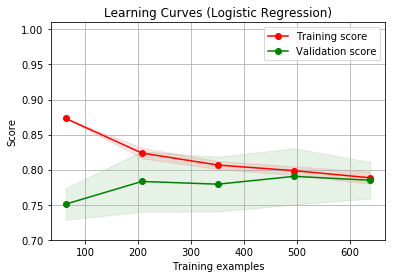

In [45]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

Learning curves in a nutshell:
* Learning curves allow us to diagnose if the model is **overfitting** or **underfitting**.
* When the model **overfits**, 
 * it means that it performs well on the training set, but not on the validation set. Accordingly, the model is not able to generalize to unseen data.
 * the learning curve will present a gap between the training and validation scores. 
 * we should try to reduce the complexity of the model and/or collect more data.
* On the other hand, when the model **underfits**,
 * it means that the model is not able to perform well in either training or validations sets. 
 * the learning curves will converge to a low score value. 
 * gathering more data is not helpful because the model is already not being able to learn the training data. The best approaches are to improve the model (e.g., tune the hyperparameters) or to improve the quality of the data (e.g., collect a different set of features).

Results and discussion:
* The model doesn't overfit. As we can see, the curves converge and no gap between the training and the validation score exists in the last points of the curve.
* The model underfits. Our final score is about 0.786. Although our model does better predictions than a [flip-a-coin strategy](https://en.wikipedia.org/wiki/Flipism), it is still far from being an &#x201c;intelligent&#x201d; model. For now, it's just an &#x201c;artificial&#x201d; model.

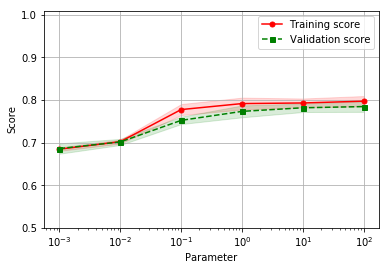

In [46]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

Validation curves in a nutshell:
* Validation curves are a tool that we can use to improve the performance of our model. In particular, to tune the hyperparameters.
* Validation curves differ from learning curves. The goal of validation curves is to see how the hyperparameters impact the training and validation scores.
* Once again, if there is a gap between the training and the validation score, the model is probably overfitting. By contrast, if there is no gap but the score values are low, we can say that the model underfits.

Results and discussion:
* The figure shows that, as far as we choose a C value of $10^{-1}$ or higher, the model's performance is similar. Note that in a logistic regression, C is the only hyperparameter that we can change.

---

# 2. The chubby data set

Up to this point, our model:

* Can achieve a 0.786 +/- 0.026 accuracy.
* Is based on a logistic regression.
* Uses 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex', and 'Embarked as inputs; and 'Survived' as output.

Moreover, concerning the practical methodology that we are following, we can say that:
* We have a working end-to-end pipeline.
* Our current model can work as a baseline model.
* We can monitor the system's performance by the learning and validation curves.

As a consequence, we are only missing the last step of the practical methodology: to decide what to do next to improve the model. We can improve the model in the following ways:

* Improve the way we deal with the 'Age' missing data. We decided to replace missing data by a unique value, but now it may be the time to search for a better imputation strategy.
* Improve the existing features. We may explore the data to understand which features have the most influence on our model and if there is a way to boost them.
* Build new features. Create new features that can increase the predictive power of the model.

These strategies seek to improve the performance of the model by enriching the data, rather than changing the machine learning algorithm or its parameters. Thus, say goodbye to the lean approach and welcome the chubby approach!

In [47]:
# Restart data set
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [49]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [50]:
# Drop irrelevant features
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


## 2.A. Imputation of 'Age' missing data

Our first approach to estimate 'Age' missing values was to fill the gaps with a placeholder value (1000). This allowed us to get a complete data set. Since our goal was to have a working end-to-end pipeline as fast as possible, this approach was ok. However, it has several limitations. For example, we are using unrealistic replacement values that are out of range and distort the data distribution. Now that we are improving the model, it makes sense to use a different imputation method.

A different strategy may be to estimate the missing values using known relationships. In our case, we can do this by using the information in the variable 'Name'. Looking to 'Name' values, we can see the person's name and title. Person's title is relevant to estimate ages because different titles are associated to different ages. For example, a person with the title 'Master' is someone under 13 years old (['a boy can be addressed as master only until age 12'](http://bit.ly/2HfFHZr)). Therefore, we can use 'Name' to improve our imputation method.

The steps to do so are:
* Extract titles from 'Name'.
* Plot a figure with 'Name' and 'Age' to confirm that there is a connection between titles and age.
* For each title, get people's average age and use it to fill the missing values.

Let's see how this works before you start getting sinking feelings.

In [51]:
# Inspect names
df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

* The rule seems to be: *'last name'* + *','* + *'title'* + *'other names'*

In [52]:
# Extract titles from name
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [53]:
# Unique titles
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

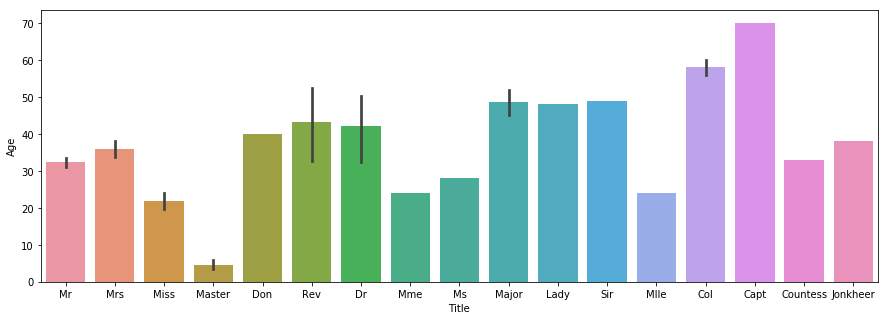

In [54]:
# Plot bar plot (titles, age and sex)
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age']);

* The bar plot gives us an estimate of the central tendency of a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).
* Apart from 'Rev' and 'Dr', which have a large error bar, the mean value of the variables seem to be stable. This favors our strategy.
* [Here](https://www.biologyforlife.com/interpreting-error-bars.html) you can find a short and sweet introduction to the interpretation of error bars.

In [55]:
# Mean values per title
df_raw['Title'] = df['Title']  # To simplify data handling
means = df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [56]:
# Transform means into a dictionary for mapping
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [57]:
# Impute ages based on titles
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [58]:
# Identify imputed data
df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,22.0,7.2500,S,1,Mr,0
1,2,1,1,female,38.0,71.2833,C,1,Mrs,0
2,3,1,3,female,26.0,7.9250,S,0,Miss,0
3,4,1,1,female,35.0,53.1000,S,1,Mrs,0
4,5,0,3,male,35.0,8.0500,S,0,Mr,0


## 2.B. Exploratory data analysis

Exploratory data analysis is often mentioned as one of the most important steps in the data analysis process. However, it's fairly easy to fall into a &#x201c;data diving&#x201d; trap (especially if you're solving problems about sunken ships) and get lost into the process.

To avoid this trap, we need to follow a hypothesis-driven approach. The hypothesis-driven approach starts by establishing hypotheses about the feature's behavior and relationships, to then focus on using data to prove (or disprove) those hypotheses. This allows us to quickly find viable hypotheses or fail fast, speeding up the process.
[Here](http://gsl-archive.mit.edu/media/programs/ghana-summer-2013/materials/problem_solving_grand_slam_7_steps_to_master_training_deck.pdf) you can find one of my favorite presentations about the benefits and procedures of a hypothesis-driven approach. 

Sometimes it may make sense to put on the diving cylinder and go dive into the depths of data analysis. However, if you can generate educated guesses about your problem, you can define a set of hypotheses and use them to start learning more about your data set.

Our hypothesis-driven approach will start by listing each of the features and generating hypotheses about their relationship with the target variable ('Survived'). Then, the hypothesis will be tested through a set of exploratory data analysis tools. Finally, we will end up with a comprehensive view about the features that should belong to our prediction model.

Let's get started:

* **PassengerId**. It's just a unique identification of each passenger. Probably not relevant to our analysis.
* **Survived**. Target variable. To sink or not to sink is the question of this exercise.
* **Pclass**. This is the ticket class. According to Karl Marx, this should affect our target variable because rich people tend to be favored.
* **Name**. Names are a form of social tagging, especially when accompanied by a title. As a consequence, it can lead to different forms of treatment. Let's keep an eye on this.
* **Sex**. Always important.
* **Age**. It should be important. For example, in a disaster situation, children are usually evacuated first so that we can think about a solution in silence. Joking, the true reason why 'Age' matters is this [one](http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html#ixzz54KETWEPr).
* **SibSp**. Number of siblings/spouses aboard the Titanic. I'd say that it's easier to survive if you're with your family than if you're travelling alone. [Teamwork](https://youtu.be/1qzzYrCTKuk) is always important.
* **Parch**. Number of parents/children aboard the Titanic. It should play with 'SibSp'.
* **Ticket**. This is the ticket number. Unless it has some information about places, it shouldn't be important for prediction purposes.
* **Fare**. Same logic as 'Pclass'.
* **Cabin**. The cabin number can indicate where people were during the disaster. It wouldn't be surprising if it had some influence in survival chances. Unfortunately, this variable was excluded due to its high percentage of missing values.
* **Embarked**. When the sun rises, it rises for everyone. It's not expectable that people coming from Cherbourg are more unlucky than people coming from Southampton. Unless there is some second order effect, [like refusing to run away to keep your honor as a man](http://www.mindblowing-facts.org/2013/07/the-only-japanese-who-survived-the-titanic-lost-his-job-because-he-was-known-as-a-coward-in-japan-for-not-dying-with-the-other-passengers/), I would say that this variable is not important.

Now, step by step, let's perform our analysis.

### Pclass

**Hypothesis**: if the travel class is higher, than the survival chances are higher.

To visualize if there is a relationship between 'Pclass' and 'Survival', let's do a bar plot.

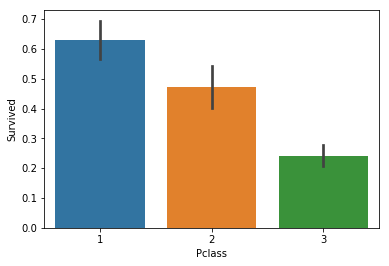

In [59]:
# Plot
sns.barplot(df['Pclass'],df['Survived']);

As we can see, about 60% of the people travelling in the first class survived. By contrast, only 25% of the people travelling in the third class survived. Accordingly, this plot suggests that travel class affects the survival chances.

### Name/Title

**Hypothesis**: if people have different titles, then they are treated in different ways.

We have several titles, but only some of them are shared by a significant number of people. Accordingly, it would be interesting if we could simplify our analysis by grouping some of the titles. Let's analyze the titles and see if we can find a way to group them. If so, we can test our new groups of titles and check if they work in an acceptable way.

In [60]:
# Count how many people have each of the titles
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

Now, we may say that:

* Titles like 'Master', 'Miss', 'Mr', and 'Mrs', appear several times. Accordingly, we will not group them.
* 'Mme' and 'Mlle', correspond to 'Mrs' and 'Miss', respectively, as described [here](https://www.frenchtoday.com/blog/french-culture/madame-or-mademoiselle-a-delicate-question). Thus, we will group these titles.
* We will group all the remaining titles in a new title named 'Other'. Since this it not obvious if it makes sense to create this new group, we will define 'Title' as a categorical feature and plot it to see how it looks like.

In [61]:
# Map of aggregated titles:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [62]:
# Group titles
df['Title'] = df['Title'].map(titles_dict)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [63]:
# Transform into categorical
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
FamilySize        int64
Title          category
Imputed           int64
dtype: object

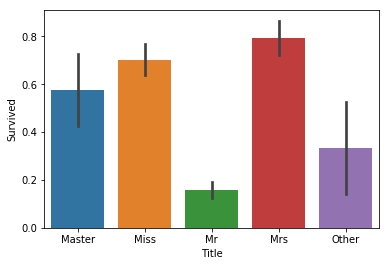

In [64]:
# Plot
sns.barplot(x='Title', y='Survived', data=df);

As mentioned before, the bar plot shows the estimate of the mean value (height of each rectangle) and the uncertainty around that central tendency (error bars).

Our results suggest that:
* People with the title 'Mr' survived less than people with any other title. 
* Titles with a survival rate higher than 50% are those that correspond to female (Miss or Mrs) or children (Master) titles.
* Our new category, 'Other', doesn't work very well. As we can see by the error bar (black line), there is a significant uncertainty around the mean value. Probably, we are mixing titles that we shouldn't be mixing because they are not related. We should perform a more detailed analysis to sort this out. 
* The category 'Master' also seems to have some uncertainty associated with it. 

For now, we will not make any changes, but we will keep these two situations in our mind for future improvement of our data set.

### Sex

**Hypothesis**: if you're a woman, then your survival chances are higher.

Sex is one of the most discussed topics in human history. There are several perspectives about the topic, but I must confess that Freud's perspectives had a significant impact on me because they have shown me the subject in a new perspective. What's new about Freud is that he associated many &#x201c;normal&#x201d; behaviors to sexual drives, leading us to question everything we do. It seems that in the end of his life, Freud realized that not everything was about sex. As he said, &#x201c;sometimes a cigar is just a cigar&#x201d; (Freud used to smoke cigars).

Preambles aside, what we really need to know is if sometimes a cigar is just a cigar (or not). We already have some clues that on the Titanic, women had a higher survival rate. But nothing like a plot to see what's going on.

In [65]:
# Transform into categorical
df['Sex'] = pd.Categorical(df['Sex'])

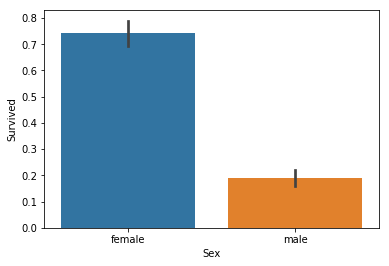

In [66]:
# Plot
sns.barplot(df['Sex'],df['Survived']);

Our hypothesis seems to be right. The world belongs to women, and so does the Titanic.

### Age

**Hypothesis**: if you're a child, then your survival chances are higher.

'Age' is the next variable in the list. I have an intuition about children that I don't have about elders. Elders are vulnerable and this can have one of two effects: either people help elders because they are more vulnerable, or they they are not able to cope with the challenges posed by the wreck of the ship.

Let's call the usual suspect (bar plot) to help us understand the situation.

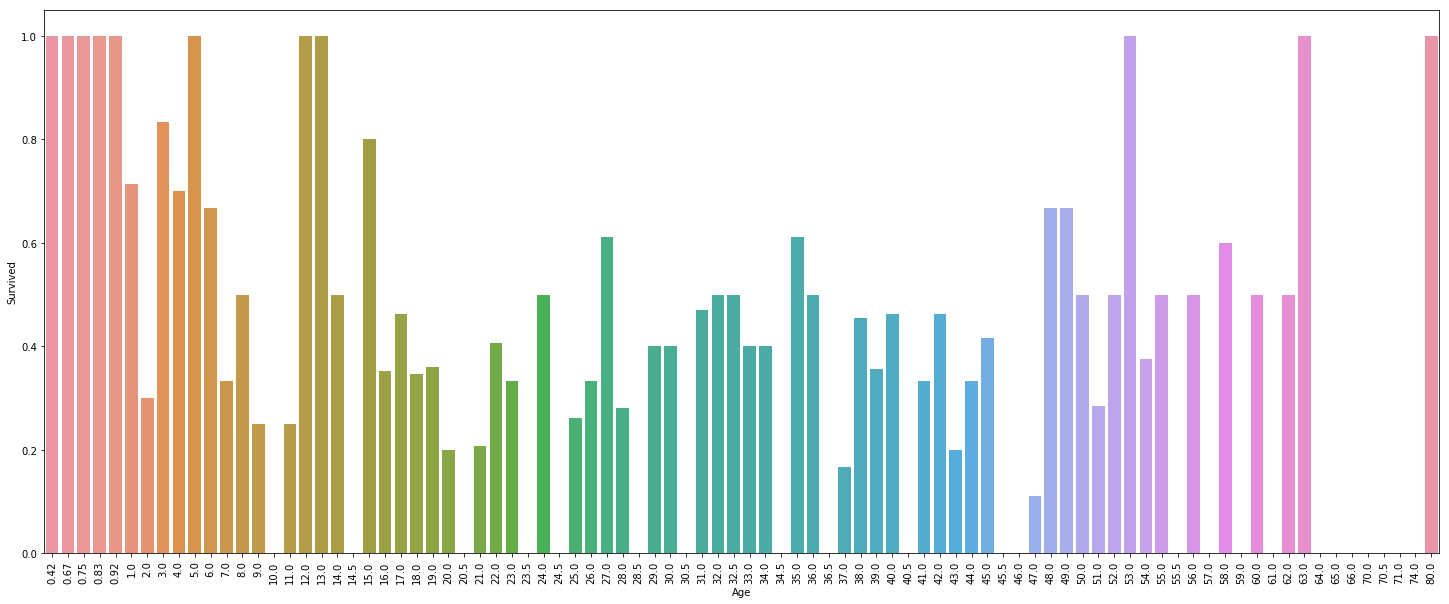

In [67]:
# Plot
plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)
plt.xticks(rotation=90);

With a little bit of creativity, we can say that the plot has three regions: 

1. Age between 0 and 15. 
1. Age between 15 and 48.
1. Age between 48 and 80. 

This classification is arguable in regards to the last two categories. However, it's a classification that fits into what we know about the way that society is organized: children, adults, and elders. For now, let's assume that this classification is fine.

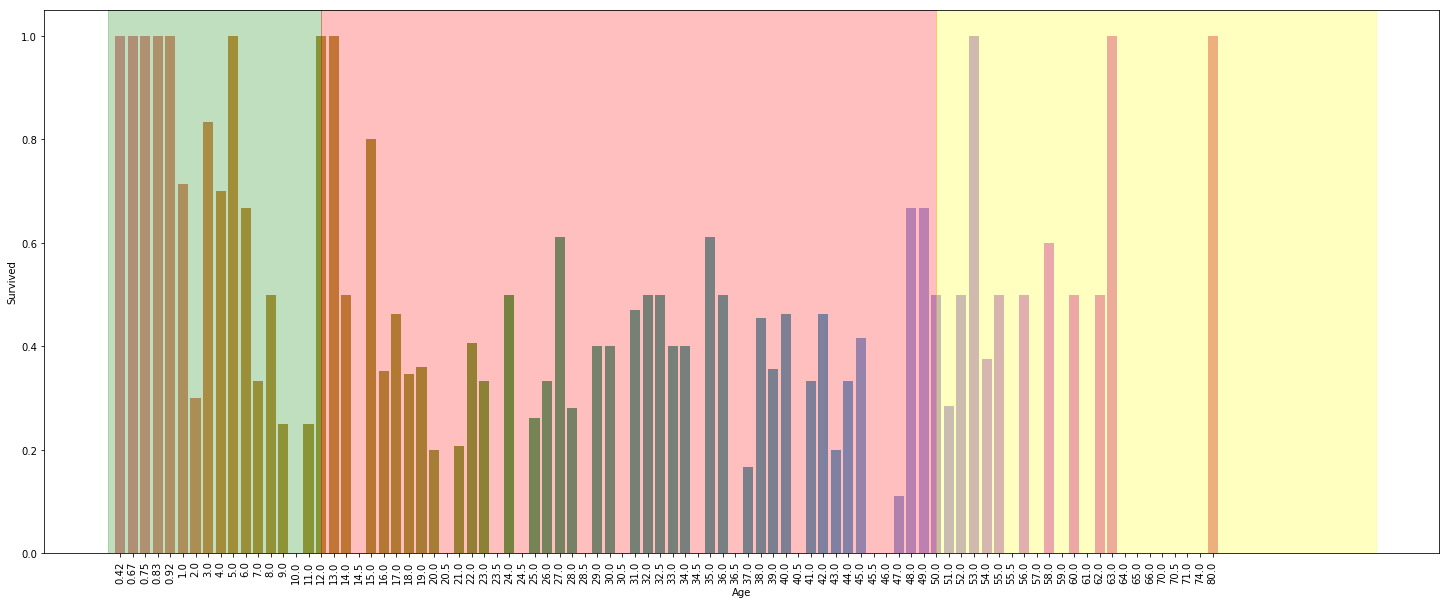

In [68]:
# Plot
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

In [69]:
# Bin data
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

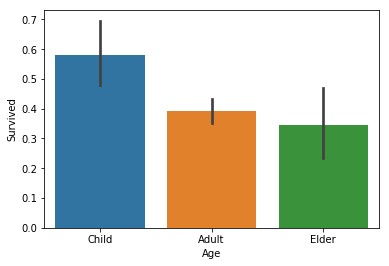

In [70]:
# Plot
sns.barplot(df['Age'], df['Survived']);

The plot suggests that children have a higher survival rate. It also indicates that, for survival purposes, there is no difference between the classes 'Adult' and 'Elder'. Thus, we could have considered only two classes: children and adults.

### FamilySize

**Hypothesis**: if people travel alone, then their survival chances are lower.

The assumption is that people with family can collaborate and help each other to escape. Let's see what the data tells us.

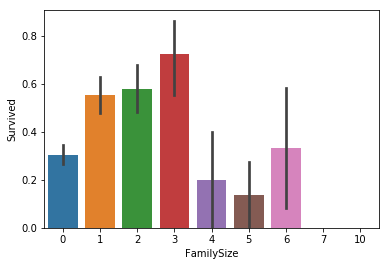

In [71]:
# Plot
sns.barplot(df['FamilySize'], df['Survived']);

As we can see, when 'FamilySize' is between 0 and 3, our hypothesis seems to find some support. People travelling alone have a lower survival rate than people travelling in family. 

However, when FamilySize is between 4 and 10, things start to change. Despite the large variability of the results, the survival rate drops. This may suggest that our hypothesis should be revised for the case 'FamilySize' higher than 3.

### Fare

**Hypothesis**: if the fares are higher, then the survival chances are higher.

The logic for 'Fare' is similar to the one applied to 'Pclass'. In this case, we will use a box plot instead of a bar plot.

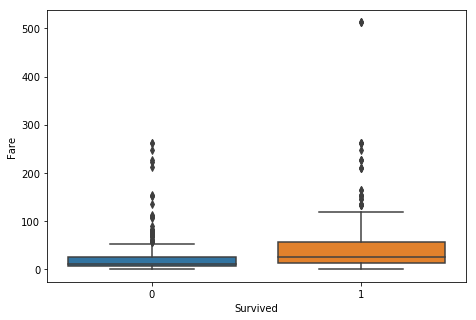

In [72]:
# Plot
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);

The plot suggests that those who survived paid a higher fare. Since we believe that this feature is connected with 'Pclass', let's see how they work together.

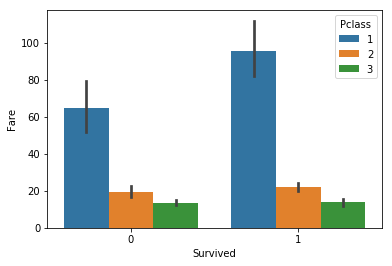

In [73]:
# Plot
sns.barplot(df['Survived'], df['Fare'], df['Pclass']);

Here we have an interesting result. It seems that, if you're travelling in second or third class, 'Fare' doesn't make difference in terms of survival. However, if you're travelling in first class, higher fares lead to higher survival chances. Thus, it would make sense to explore the creation of interaction features between 'Fare' and 'Pclass'.

### Embarked

**Hypothesis**: survival chances are independent of the place where people embarked.

It is hard to imagine a scenario in which people from Southampton, for instance, would have such a competitive advantage that it would make them more apt for survival than people from Queensland. Yes, in Darwin we believe, and a simple plot should confirm our belief.

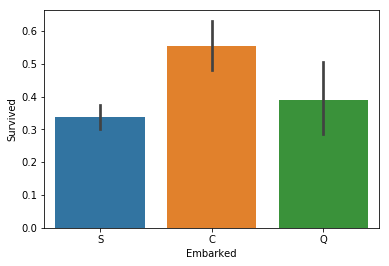

In [74]:
# Plot
sns.barplot(df['Embarked'], df['Survived']);

Oops... It seems that people embarking on C were selected by a superior entity to survive. This is strange and may be hiding some relationship that is not shown by this plot (e.g., people embarking on C were mostly women).

Let's check.

In [75]:
# Compare with other variables
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,FamilySize,Imputed
Embarked,,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,27.079812,0.984472,0.139752


* It seems that people embarking on C were paying more and traveling in higher class than people embarking on Q and S.

In [76]:
# Relationship with age
df.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

* No significant differences can be found.

In [77]:
# Relationship with sex
df.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

* The female/male ratio is higher in C and Q than in S.

Considering the results above, I feel tempted to say that the embarkment point doesn't influence the survival rate. What really seems to influence is the class in which people were traveling and how much they were spending.

For now, I will not delete the variable because I feel that I'm a little bit biased and trying to force a conclusion. However, let's keep in mind that maybe 'Embarked' doesn't affect 'Survived'.

## 2.C. Feature extraction

In the book [_How Google Works_](https://amzn.to/2M9hvv7), Eric Schmidt and Jonathan Rosenberg infer that Google's secret sauce is &#x201c;technical insight.&#x201d; According to the authors, it is fundamental technical insight that allows companies to create great products, which provide real value to the customers. For example, [PageRank](http://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm) gave an incredible competitive advantage to Google in relation to other search engines because it provided a far better way to rank search results on the web.

**Feature extraction** is our technological insight in machine learning. It addresses the problem of attaining the most informative and compact set of features to improve the performance of machine learning models. In this context, &#x201c;informative&#x201d; means that we are looking for features that can characterize the behavior of what we are trying to model. For instance, if we want to create a model for weather forecast, features like temperature, humidity, and wind are informative (they are related to the problem). By contrast, the result of a football game will not be an informative feature because it doesn't affect the weather (as far as we know).

By &#x201c;compact,&#x201d; what is meant is we should exclude features that are irrelevant for the model. There are several reasons to exclude irrelevant features. In our case, I'd say that the most important reason is to reduce overfitting. Consider the weather example: we know that the result of a football game doesn't affect the weather, but suppose that all rain instances in our training set happen to occur after a [Benfica](https://youtu.be/qX0D7xkF33s) victory. Then, our model might learn that rain is related to Benfica's victories, which is not true. Such an incorrect generalization from an irrelevant feature would result in a machine learning model that fits a particular set of data, but fails to predict future observations reliably (overfitting).

In the following sub-sections, we address these two issues by performing:
1. **Feature engineering**, which is related to the generation of informative features.
2. **Feature selection**, which regards the choice of a compact set of features.

### Feature engineering

Feature engineering is the art of converting raw data into useful features. There are several feature engineering techniques that you can apply to be an artist. A comprehensive list of them is presented by [Heaton (2016)](https://arxiv.org/pdf/1701.07852.pdf). We will use just two techniques:
* Box-Cox transformations [(Box & Cox 1964)](https://www.nuffield.ox.ac.uk/users/cox/cox72.pdf);
* Polynomials generation through non-linear expansions.

Before the application of these techniques, we will just make some adjustments to the data in order to prepare it for the modeling process.

#### Data preparation

In [78]:
# Overview
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,Adult,7.2500,S,1,Mr,0
1,2,1,1,female,Adult,71.2833,C,1,Mrs,0
2,3,1,3,female,Adult,7.9250,S,0,Miss,0
3,4,1,1,female,Adult,53.1000,S,1,Mrs,0
4,5,0,3,male,Adult,8.0500,S,0,Mr,0


In [79]:
# Drop feature
df.drop('PassengerId', axis=1, inplace=True)

In [80]:
# Check features type
df.dtypes

Survived         int64
Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked        object
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [81]:
# Transform object into categorical
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df.dtypes

Survived         int64
Pclass        category
Sex           category
Age           category
Fare           float64
Embarked      category
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [82]:
# Transform categorical features into dummy variables
df = pd.get_dummies(df, drop_first=1)  
df.head()

,Survived,Fare,FamilySize,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,7.2500,1,0,0,1,1,1,0,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0,0,1,0
4,0,8.0500,0,0,0,1,1,1,0,0,1,0,1,0,0


In [83]:
# Get training and test sets
from sklearn.model_selection import train_test_split

X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#### Box-Cox transformations

Box-Cox transformations aim to normalize the features. These transformations are an alternative to conventional transformations such as the square root transformation, log transformation, and inverse transformation. The main advantage of the Box-Cox transformations is that they optimally normalize the chosen feature. Thus, they avoid the need to randomly try different transformations, automating the data transformation process.

In [84]:
# Apply Box-Cox transformation
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] + 1)[0]

#### Polynomials

We can enrich our set of features by generating polynomials. Polynomial expansion creates interactions between features, as well as creates powers (e.g., the square of a feature). This way, we introduce a nonlinear dimension to the data set, which can improve the predictive power of our model.

We should scale our features when we have polynomial terms because they tend to produce multicollinearity, which can make our estimates very sensitive to minor changes in the model. Scaling features to a specific range allows us to reduce multicollinearity and its consequences.

To scale the features, we will transform the data so that they are within a certain range of values. We will use a MinMax scaler and say that our values should be between zero (minimum value) and one (maximum value).

In [85]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [86]:
# Get polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [87]:
# Debug
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

### Feature selection

The next step is to perform feature selection. Feature selection is about chosing the relevant information, which is important to avoid cases where the existence of certain variables impairs the performance of the model. [Guyon & Elisseeff (2003)](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf) provide a concise introduction to the feature selection subject.

In this notebook, we will use an univariate approach. This approach selects features based on univariate statistical tests between each feature and the target variable. The intuition is that features that are independent from the target variable are irrelevant for classification purposes.

We will use the chi-squared test for feature selection. This means that we need to choose upfront the number of features that we want in our model. For example, if we want three features in our model, the method will select the three features with highest $\chi^2$ score.

Since we don't know how many features our model should have, we will test the method with all the possible combinations and choose the one that performs better.

#### Univariate statistics

In [88]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Get score using original model
logreg = LogisticRegression(C=1, max_iter=1000)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

## Get score using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, 
                                                                     np.mean(scores), 
                                                                     np.std(scores)))
    
    # Save results if best score
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        
# Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.822 +/- 0.035
CV accuracy (number of features = 1): 0.789 +/- 0.049
CV accuracy (number of features = 2): 0.789 +/- 0.049
CV accuracy (number of features = 3): 0.789 +/- 0.049
CV accuracy (number of features = 4): 0.789 +/- 0.049
CV accuracy (number of features = 5): 0.789 +/- 0.049
CV accuracy (number of features = 6): 0.789 +/- 0.049
CV accuracy (number of features = 7): 0.785 +/- 0.043
CV accuracy (number of features = 8): 0.785 +/- 0.043
CV accuracy (number of features = 9): 0.785 +/- 0.043
CV accuracy (number of features = 10): 0.798 +/- 0.042
CV accuracy (number of features = 11): 0.798 +/- 0.042
CV accuracy (number of features = 12): 0.798 +/- 0.042
CV accuracy (number of features = 13): 0.798 +/- 0.042
CV accuracy (number of features = 14): 0.798 +/- 0.042
CV accuracy (number of features = 15): 0.798 +/- 0.042
CV accuracy (number of features = 16): 0.795 +/- 0.038
CV accuracy (number of features = 17): 0.795 +/- 0.038
CV accuracy (number of features = 

---

# 3. Unicorn model

Startups use the term &#x201c;unicorn&#x201d; to describe a startup that is valued at one billion dollars or more. The reason why we do that is because, just like unicorns, it is rare to find startups with such value.

We've been through a long journey since we started this notebook. As you may remember, we started with a lean model and we progressively scaled our startup: we imputed missing data, we performed an exploratory data analysis, and we extracted features. In the meantime, we also dealth with some of my terrible Titanic jokes that take some time to sink in.

Now, it's time to turn all this work into a highly accurate model: the &#x201c;unicorn&#x201d; model.

## 3.A. Fit model for best feature combination

In [89]:
# Select features
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [90]:
# Fit model
logreg = LogisticRegression(C=1, max_iter=1000)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.825 +/- 0.041


## 3.B. Learning curve

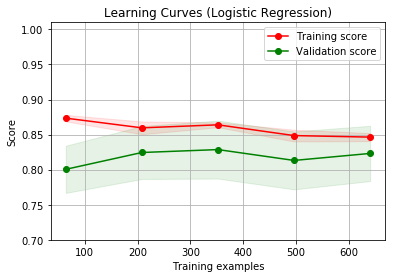

In [92]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

No signs of overfitting or underfitting.

## 3.C. Validation curve

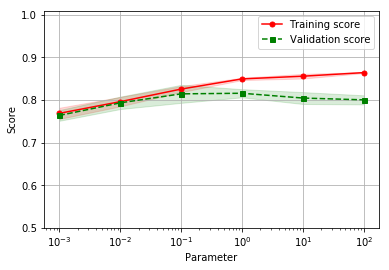

In [93]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, 
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);

We used C=1, which is on the edge of overfitting. Regarding underfitting, there are no signs of it since the model performs well.

## 3.D. Submit predictions

In [94]:
# Get test data set
df = pd.read_csv('template_bh/data/test.csv')
df_raw = df.copy()

In [95]:
# Transform data set (based on Chapter 2)

## 2.2
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
df_raw['Title'] = df['Title']  
means = df_raw.groupby('Title')['Age'].mean()
map_means = means.to_dict()
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Title'].loc[idx_nan_age].map(map_means)
df['Title'] = df['Title'].map(titles_dict)
df['Title'] = pd.Categorical(df['Title'])

df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1

df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])

## 2.3
passenger_id = df['PassengerId'].values
df.drop('PassengerId', axis=1, inplace=True)
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df = pd.get_dummies(df, drop_first=1)

df = df.fillna(df.mean())  # There is one missing value in 'Fare'

X = df[df.loc[:, df.columns != 'Survived'].columns]

X_transformed = X.copy()
X_transformed['Fare'] = boxcox(X_transformed['Fare'] + 1)[0]

scaler = MinMaxScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

poly = PolynomialFeatures(degree=2).fit(X_transformed)
X_poly = poly.transform(X_transformed_scaled)

X_poly_selected = select.transform(X_poly)

In [96]:
# Make predictions
predictions = logreg.predict(X_poly_selected)

In [97]:
# Generate submission file
submission = pd.DataFrame({ 'PassengerId': passenger_id,
                            'Survived': predictions})
submission.to_csv('template_bh/data/submission.csv', index=False)

---

# 4. Conclusion

As [Halevy et al. (2009)](https://static.googleusercontent.com/media/research.google.com/pt-PT//pubs/archive/35179.pdf) noted &#x201c;invariably, simple models and a lot of data trump more elaborate models based on less data.&#x201d; [Monica Rogati](https://youtu.be/F7iopLnhDik) added that &#x201c;better data beats more data.&#x201d; Based on these principles, the aim of this study was to improve data quality through exploratory data analysis and feature extraction. We didn't use a clever algorithm, but we explored clever techniques to make our data better.

My expectation is that after reading this notebook, you can start your own cookbook of techniques in exploratory data analysis and feature extraction. These techniques will help you to trust your data and to engage with any data science problem. Also, the more you use and refine these techniques, the more you'll be able to develop your problem solving skills.

Now, it's your turn. Make this work yours. Select a part of this notebook and play with it. Why not trying a different feature selection process? Or another imputation method? There are a hundred different ways to [steal this work like an artist](https://youtu.be/oww7oB9rjgw). Do it... After all, all unicorns started with a MVP.

---

# References

**Books**

* [Ries, E., 2011. The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically Successful Businesses](https://amzn.to/2JsIMH3)
* [Hair, J.F., Black, W.C., Babin, B.J., Anderson, R.E. and Tatham, R.L., 2013. Multivariate data analysis](https://amzn.to/2JtC1Vm)
* [Asefeso, A., Lund, S.B., Parry, H., 2014. Keep Your Eyes On the Horizon: Business Lessons from Unsinkable Titanic](https://amzn.to/2JwpsIT)

**Papers**

* [Heaton, J., 2016. An empirical analysis of feature engineering for predictive modeling. In SoutheastCon, 2016 (pp. 1-6). IEEE.](https://arxiv.org/pdf/1701.07852.pdf)
* [Box, G.E. and Cox, D.R., 1964. An analysis of transformations. Journal of the Royal Statistical Society. Series B (Methodological), pp.211-252.](https://www.nuffield.ox.ac.uk/users/cox/cox72.pdf)
* [Guyon, I. and Elisseeff, A., 2003. An introduction to variable and feature selection. Journal of machine learning research, 3(Mar), pp.1157-1182.](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf)
* [Halevy, A., Norvig, P. and Pereira, F., 2009. The unreasonable effectiveness of data. IEEE Intelligent Systems, 24(2), pp.8-12.](https://static.googleusercontent.com/media/research.google.com/pt-PT//pubs/archive/35179.pdf)

**Videos**

* [Rogati, M., 2012. The Model and the Train Wreck: A Training Data How-To. O'Reilly Strata.](https://youtu.be/F7iopLnhDik)
* [Kleon, A., 2012. Steal like an artist. TEDx Talks.](https://youtu.be/oww7oB9rjgw)